**CREDIT CARD FRAUD DETECTION**

Import Libraries

In [12]:
# Loan Default Prediction
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from warnings import filterwarnings

Load Dataset

In [13]:
# Load the data
df = pd.read_csv('/content/fraudTrain.csv')
dt = pd.read_csv('/content/fraudTest.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


Statistical Analysis About The Data

In [14]:
df.shape

(186931, 23)

In [15]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,186931.000000,1.869310e+05,186931.000000,186930.000000,186930.000000,186930.000000,1.869300e+05,1.869300e+05,186930.000000,186930.000000,186930.000000
mean,93465.000000,4.157791e+17,71.314136,48791.614187,38.539795,-90.210275,9.048463e+04,1.329871e+09,38.542030,-90.210699,0.008431
std,53962.475922,1.306542e+18,159.490534,26892.530856,5.073626,13.756248,3.057288e+05,2.441553e+06,5.107893,13.767937,0.091433
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,46732.500000,1.800360e+14,9.660000,26237.000000,34.668900,-96.790900,7.430000e+02,1.327762e+09,34.745143,-96.882726,0.000000
50%,93465.000000,3.519610e+15,47.720000,48174.000000,39.354300,-87.476900,2.457000e+03,1.330127e+09,39.359305,-87.429156,0.000000
75%,140197.500000,4.642260e+15,83.630000,72011.000000,41.894800,-80.158000,2.112500e+04,1.331996e+09,41.957338,-80.219743,0.000000
max,186930.000000,4.992350e+18,15034.180000,99783.000000,66.693300,-67.950300,2.906700e+06,1.333789e+09,67.510267,-66.967742,1.000000


In [16]:
dt.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186931 entries, 0 to 186930
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             186931 non-null  int64  
 1   trans_date_trans_time  186931 non-null  object 
 2   cc_num                 186931 non-null  float64
 3   merchant               186931 non-null  object 
 4   category               186931 non-null  object 
 5   amt                    186931 non-null  float64
 6   first                  186931 non-null  object 
 7   last                   186931 non-null  object 
 8   gender                 186931 non-null  object 
 9   street                 186931 non-null  object 
 10  city                   186931 non-null  object 
 11  state                  186930 non-null  object 
 12  zip                    186930 non-null  float64
 13  lat                    186930 non-null  float64
 14  long                   186930 non-nu

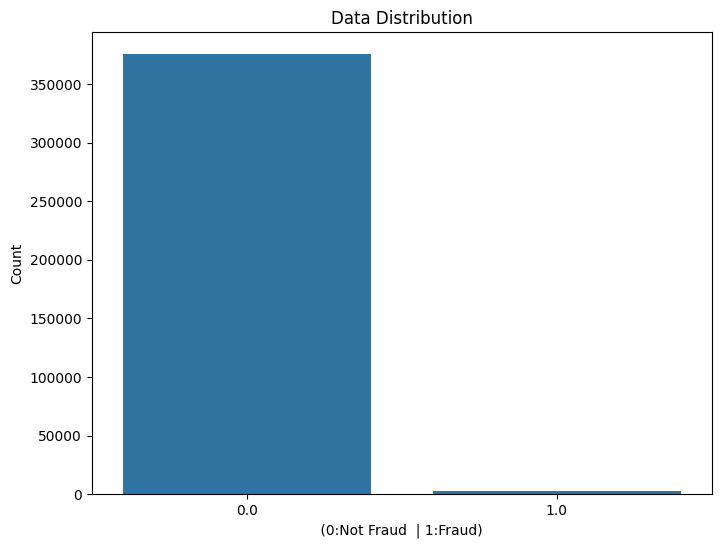

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=pd.concat([df, dt], ignore_index=True))
plt.title('Data Distribution')
plt.xlabel(' (0:Not Fraud  | 1:Fraud) ')
plt.ylabel('Count')
plt.show()

**Pre - Processing Data**

Checking for Null Values

In [19]:
#Checking for null values
print(df.isnull().sum())
print(dt.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat            

In [20]:
df = df.drop_duplicates()
dt = dt.drop_duplicates()
df = df.dropna()
dt = dt.dropna()

In [21]:
cols_to_drop = ['Unnamed: 0','cc_num','merchant','first','last','trans_num','unix_time','street','category','trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','state']
df.drop(columns=cols_to_drop,inplace = True)
dt.drop(columns=cols_to_drop,inplace = True)

In [22]:
df.shape

(186930, 5)

In [23]:
df.gender =[ 1 if value == "M" else 0 for value in df.gender]
dt.gender =[ 1 if value == "M" else 0 for value in dt.gender]

In [24]:
df.head()

,amt,gender,zip,city_pop,is_fraud
0,4.97,0,28654.0,3495.0,0.0
1,107.23,0,99160.0,149.0,0.0
2,220.11,1,83252.0,4154.0,0.0
3,45.00,1,59632.0,1939.0,0.0
4,41.96,1,24433.0,99.0,0.0


**Split the data into training and testing tests**

In [25]:
x_train = df.drop('is_fraud',axis=1)
x_test = dt.drop('is_fraud',axis=1)
y_train = df['is_fraud']
y_test = dt['is_fraud']

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

**Logistic Regression**

In [27]:
#Applying logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

#predicting the Results
y_pred = model.predict(x_test)

#Confusion matrix
confusion_matrix(y_test,y_pred)

accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 99.44


**Random Forest**

In [30]:
# Random Forest classification
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

rf_y_pred = rf_model.predict(x_test)

# Compute the confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
accuracy=accuracy_score(y_test, rf_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 99.51


**Gradient Descent**

In [31]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)

# Predict the labels for the test data
gb_y_pred = gb_model.predict(x_test)

# Compute the confusion matrix for Gradient Boosting
gb_cm = confusion_matrix(y_test, gb_y_pred)

accuracy=accuracy_score(y_test, gb_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 99.50


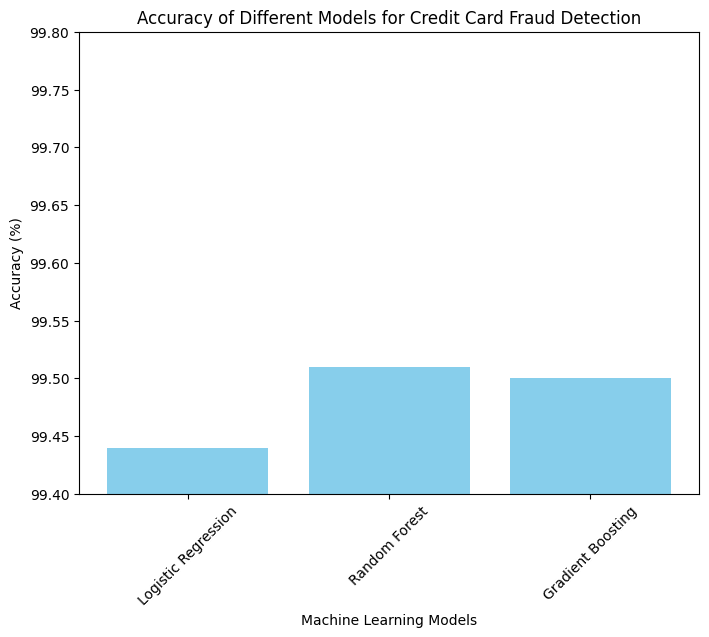

In [32]:
import matplotlib.pyplot as plt

models = ["Logistic Regression","Random Forest", "Gradient Boosting"]
accuracies = [99.44, 99.51, 99.50]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models for Credit Card Fraud Detection')
plt.ylim(99.4, 99.8)
plt.xticks(rotation=45)
plt.show()

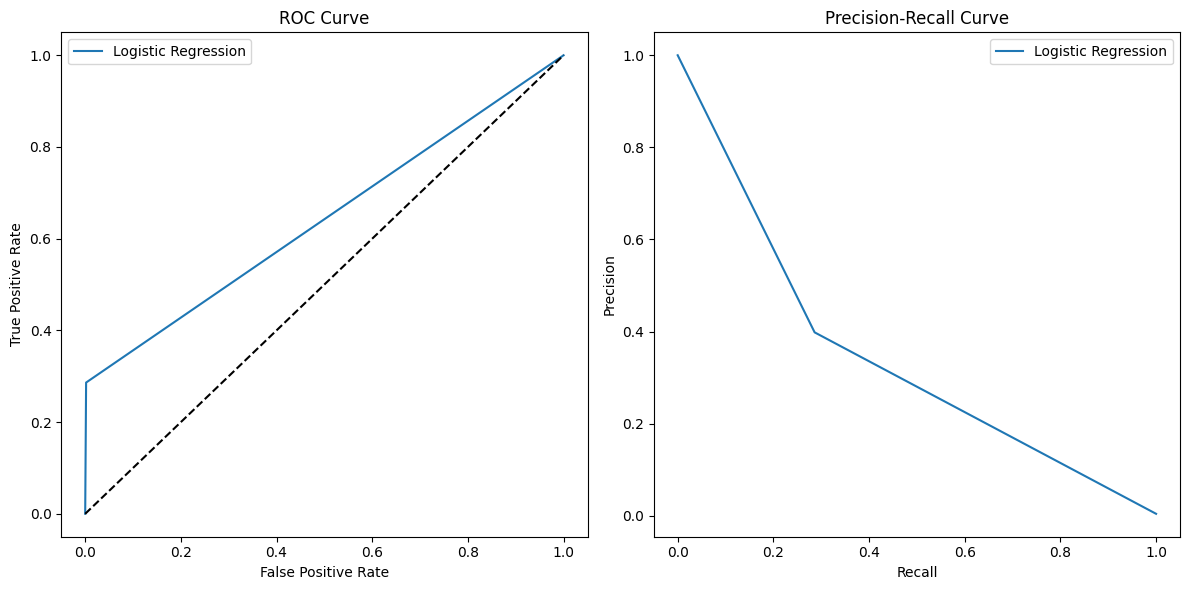

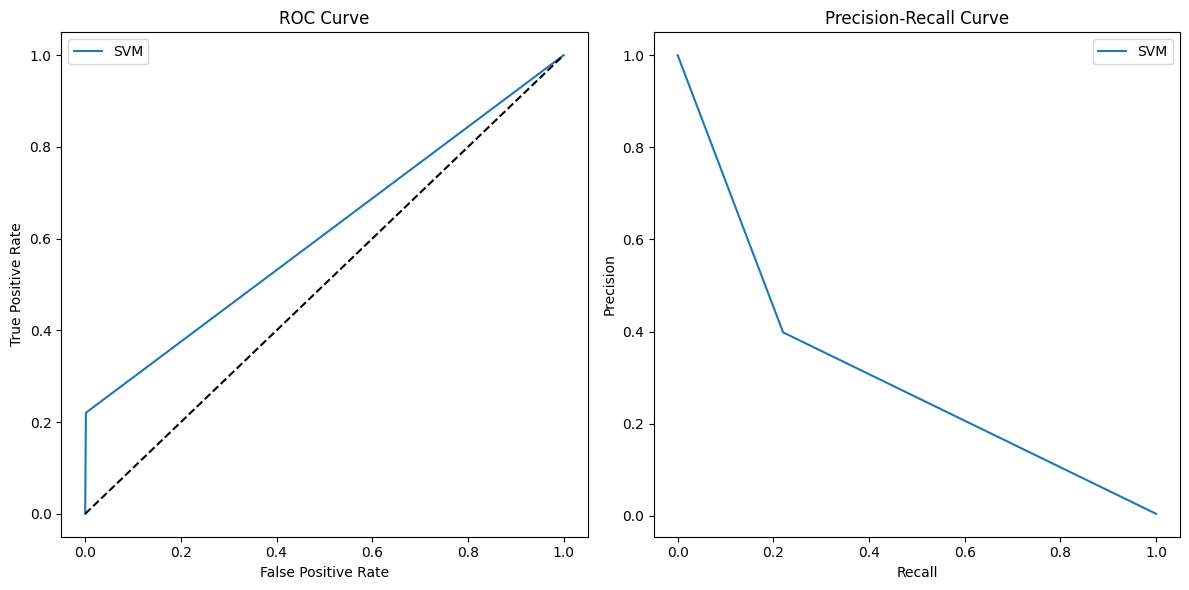

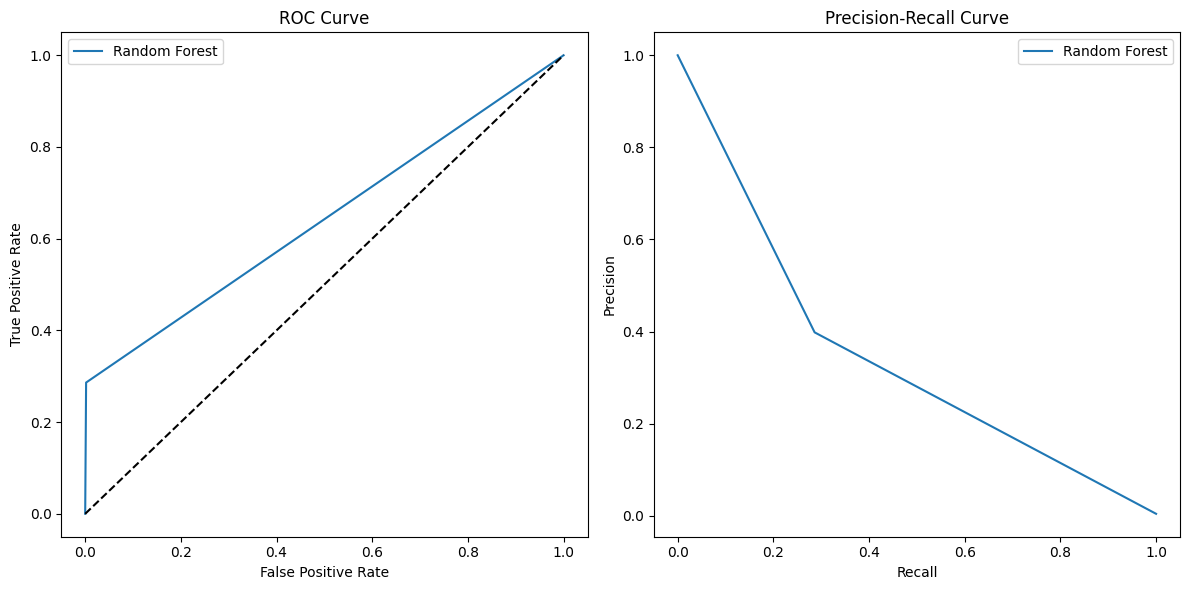

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Create lists to store ROC and Precision-Recall data for all models
models = ["Logistic Regression", "SVM", "Random Forest", "Gradient Boosting"]
fpr_list = []
tpr_list = []
precision_list = []
recall_list = []

# Loop through each model
for model, y_pred in zip(models, [y_pred,rf_y_pred, gb_y_pred]):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    precision_list.append(precision)
    recall_list.append(recall)

    # Plot ROC Curve
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=model)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Plot Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()